In [102]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, draw
import matplotlib
from matplotlib import ticker
from labellines import labelLine, labelLines
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec


query_list = [2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 30000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000]
q_list = np.array(np.array(query_list)/1000, dtype=int)

In [78]:
def readlogs(filename, epsilon=1.5):
    lines = open(filename).readlines()
    #distortion_list = [0]*len(query_list)
    distortion_list = [[] for _ in range(len(query_list))]
    count = 0
    nowq = 0
    success = 0
    for line in lines: 
        if line[0:8]=="========":
            sp = line.strip().split()
            delta = float(sp[4])
            nowq = 0
            count += 1

        if line[0:9]=="Iteration":
            sp = line.strip().split()
            nquery = int(sp[5])
            if nowq < len(query_list):
                while nquery > query_list[nowq]:
                    distortion_list[nowq].append(delta)
                    nowq += 1
                    if nowq == len(query_list):
                        break 
            delta = float(sp[3])

        if line[0:11] =="Adversarial":
            while nowq < len(query_list):
                distortion_list[nowq].append(delta)
                nowq += 1
            if float(line.split()[5]) <= epsilon:
                success += 1
            
        # Boundary attack format.
        if line[0:7]=="Step 0:":
            sp = line.strip().split()
            delta = float(sp[3])
            nowq = 0
            count += 1

        if line[0:5]=="Step ":
            sp = line.strip().split()
            iteration = int(sp[1][:-1])
            if iteration != 0:
                nquery = int(sp[5])
                if nowq < len(query_list):
                    while nquery > query_list[nowq]:
                        distortion_list[nowq].append(delta)
                        nowq += 1
                        if nowq == len(query_list):
                            break 
                delta = float(sp[3])

        if line[0:11] == "adversarial":
            while nowq < len(query_list):
                distortion_list[nowq].append(delta)
                nowq += 1        
            if float(line.split()[5]) <= epsilon:
                success += 1

    medians = []
    for ii in range(len(distortion_list)):
        medians.append(np.median(distortion_list[ii]))

    success_rate = []
    for ii in range(len(distortion_list)):
        success_rate.append( np.sum(np.array(distortion_list[ii])<=epsilon)/float(len(distortion_list[ii])) )
    print("Success rate {0}".format(success)) 
    return medians, success_rate


In [109]:
font = {'size': 20}

matplotlib.rc('font', **font)


def plot_graphs(m_opt=None, m_sign=None, m_boundary=None, title=None, filename=None,
                ylim=None, xlim=None, text=None, text_x=None, xlabel=None, ylabel=None, legend=True, cw=None,
                figsize=None, label1='OPT', label2='Sign-OPT', display=True, axes=None, plots=[],
                legendsize=None, yformatter=None):

    ax = plt
    if axes is not None:
        ax = axes
    
    if axes is None:
        if figsize is not None:
            fg = figure(figsize=figsize)
        else:
            fg = figure()
            
    if m_sign is not None:
        ax.plot(q_list, m_sign, label=label2, linewidth=3.5)#marker='v', markersize=10)
    if m_opt is not None:
        ax.plot(q_list, m_opt, '--', label=label1,linewidth=3.5)#marker='o', markersize=10)
    
    if m_boundary is not None:
        ax.plot(q_list, m_boundary, '-.', label='Boundary', linewidth=3.5)
        
    for plot in plots:
        ydata = plot[0]
        label = plot[1]
        linestyle = plot[2]
        color = plot[3]
        ax.plot(q_list, ydata, plot[2], label=label, linewidth=3.5, color=color)
        
    if cw is not None:
        ax.plot(q_list, [cw]*len(q_list), ':', label='CW', color='black', linewidth=2)
    if title is not None:
        if axes is not None:
            ax.set_title(title)
        else:
            ax.title(title)
    if xlabel:
        if axes is not None:
            ax.set_xlabel(xlabel)
        else:
            ax.xlabel(xlabel)
    if ylabel:
        if axes is not None:
            ax.set_ylabel(ylabel)
        else:
            ax.ylabel(ylabel)
        #ax.ylabel(ylabel)
        #ax.set_ylabel(ylabel)
    if ylim is not None:
        if axes is not None:
            ax.set_ylim(ylim[0], ylim[1])
        else:
            ax.ylim(ylim[0], ylim[1])        
    if xlim is not None:
        if axes is not None:
            ax.set_xlim(xlim[0], xlim[1])
        else:
            ax.xlim(xlim[0], xlim[1])        
        
    if legend:
        ax.legend(prop={'size':legendsize})
        
    if axes is not None:
        ax.xaxis.set_major_formatter(
            ticker.FuncFormatter(lambda x, p: '{0}k'.format(int(x))))
    else:
        ax.gca().xaxis.set_major_formatter(
            ticker.FuncFormatter(lambda x, p: '{0}k'.format(int(x))))
    
    if text is not None:
        ax.text(text_x, 0.5, text, ha='center', va='center', transform=plt.gca().transAxes,
                 fontsize=36)
        
    if axes is not None:
        ax.tick_params(axis='both', labelsize=20)
    else:
        ax.xticks(fontsize=20)
        ax.yticks(fontsize=20)
    
    if yformatter is not None and axes is not None:
        axes.yaxis.set_major_formatter(FormatStrFormatter(yformatter))

    #if filename is not None:
    #    fg.savefig(filename, bbox_inches='tight')
    if display:
        plt.show()


### DIST-UNTARGETED

Success rate 95
Success rate 96
Success rate 170


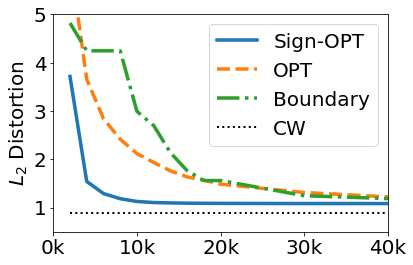

In [30]:

m_opt, s_opt = readlogs('logs/L2/mnist/untargeted/log_L2_random')
m_sgd, s_sgd = readlogs('logs/L2/mnist/untargeted/log_L2_sign')
m_bndry, s_bndry = readlogs('logs/L2/mnist/untargeted/log_L2_boundary')
cw_dist = 0.8898
plot_graphs(m_opt, m_sgd, m_boundary=m_bndry,
            xlim=[0, 40],
            ylim=[0.5, 5], filename='figs/u_l2_mnist.pdf',# text='$L_2$',
            ylabel='$L_2$ Distortion',cw=cw_dist)

Success rate 100
Success rate 100
Success rate 200


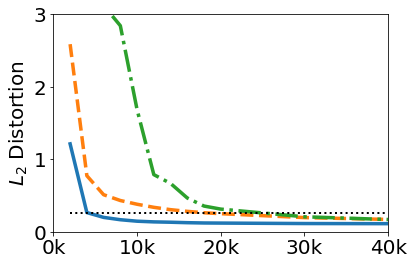

In [31]:
m_opt, s_opt = readlogs('logs/L2/cifar10/untargeted/log_L2_random')
m_sgd, s_sgd = readlogs('logs/L2/cifar10/untargeted/log_L2_sign')
m_bndry, s_bndry = readlogs('logs/L2/cifar10/untargeted/log_L2_boundary')
cw_dist = 0.2530
plot_graphs(m_opt, m_sgd, m_boundary=m_bndry, legend=False,
            xlim=[0, 40],
            ylim=[0, 3], filename='figs/u_l2_cifar.pdf', cw=cw_dist,ylabel='$L_2$ Distortion')

Success rate 13
Success rate 30
Success rate 29


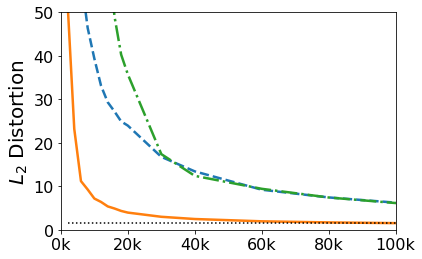

In [9]:
m_opt, s_opt = readlogs('logs/L2/imagenet/untarget/log_L2_random')
m_sgd, s_sgd = readlogs('logs/L2/imagenet/untarget/log_L2_sign')
m_bndry, s_bndry = readlogs('logs/L2/imagenet/untarget/log_L2_boundary')
cw_dist = 1.5163
plot_graphs(m_opt, m_sgd, m_boundary=m_bndry, legend=False,
            xlim=[0, 100],
            ylim=[0, 50], filename='figs/u_l2_imagenet.pdf', cw=cw_dist, ylabel='$L_2$ Distortion')

#### L_2 - Combined

Success rate 95
Success rate 96
Success rate 170
Success rate 100
Success rate 100
Success rate 200
Success rate 13
Success rate 30
Success rate 29


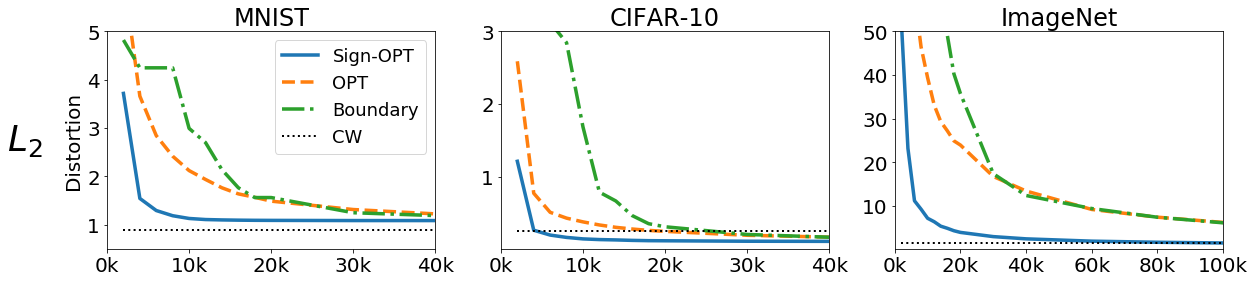

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

# MNIST
m_opt, s_opt = readlogs('logs/L2/mnist/untargeted/log_L2_random')
m_sgd, s_sgd = readlogs('logs/L2/mnist/untargeted/log_L2_sign')
m_bndry, s_bndry = readlogs('logs/L2/mnist/untargeted/log_L2_boundary')
cw_dist = 0.8898
plot_graphs(m_opt, m_sgd, m_boundary=m_bndry, axes=axes[0], display=False,
            xlim=[0, 40], legendsize=18, title='MNIST',
            ylim=[0.5, 5], text='$L_2$', text_x=-2.65,
            ylabel='Distortion',cw=cw_dist)

# CIFAR
m_opt, s_opt = readlogs('logs/L2/cifar10/untargeted/log_L2_random')
m_sgd, s_sgd = readlogs('logs/L2/cifar10/untargeted/log_L2_sign')
m_bndry, s_bndry = readlogs('logs/L2/cifar10/untargeted/log_L2_boundary')
cw_dist = 0.2530
plot_graphs(m_opt, m_sgd, m_boundary=m_bndry, legend=False, axes=axes[1], display=False,
            xlim=[0, 40], title='CIFAR-10',
            ylim=[0.01, 3], cw=cw_dist)

# IMAGENET
m_opt, s_opt = readlogs('logs/L2/imagenet/untarget/log_L2_random')
m_sgd, s_sgd = readlogs('logs/L2/imagenet/untarget/log_L2_sign')
m_bndry, s_bndry = readlogs('logs/L2/imagenet/untarget/log_L2_boundary')
cw_dist = 1.5163
plot_graphs(m_opt, m_sgd, m_boundary=m_bndry, legend=False, axes=axes[2], display=False,
            xlim=[0, 100], title='ImageNet',
            ylim=[0.2, 50], cw=cw_dist)

fig.savefig('figs/u_l2.pdf', bbox_inches='tight')
plt.show()

Success rate 71
Success rate 98


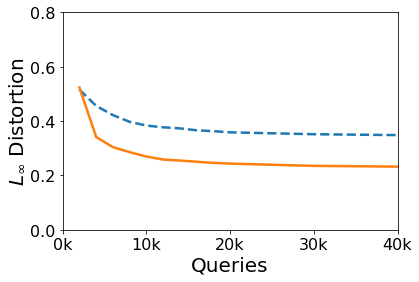

In [6]:
m_opt, s_opt = readlogs('logs/Linf/mnist/untargeted/log_Linf_random', epsilon=0.4)
m_sgd, s_sgd = readlogs('logs/Linf/mnist/untargeted/log_Linf_sign', epsilon=0.4)
plot_graphs(m_opt, m_sgd, legend=False,
            xlim=[0, 40],
            ylim=[0, 0.8], filename='figs/u_linf_mnist.pdf', #text='$L_\infty$',
            xlabel='Queries', ylabel='$L_\infty$ Distortion')

Success rate 43
Success rate 70


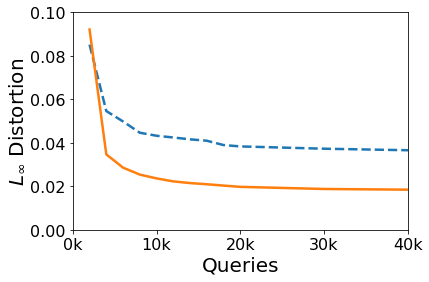

In [20]:
m_opt, s_opt = readlogs('logs/Linf/cifar10/untargeted/log_Linf_random', epsilon=0.03)
m_sgd, s_sgd = readlogs('logs/Linf/cifar10/untargeted/log_Linf_sign', epsilon=0.03)
plot_graphs(m_opt, m_sgd, legend=False,
            xlim=[0, 40],
            ylim=[0, 0.1], filename='figs/u_linf_cifar.pdf',
            xlabel='Queries',ylabel='$L_\infty$ Distortion')

Success rate 2
Success rate 7


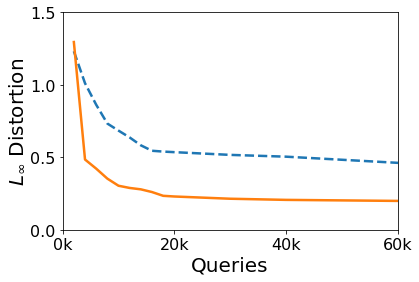

In [35]:
m_opt, s_opt = readlogs('logs/Linf/imagenet/untarget/log_Linf_random', epsilon=0.03)
m_sgd, s_sgd = readlogs('logs/Linf/imagenet/untarget/log_Linf_sign', epsilon=0.03)
plot_graphs(m_opt, m_sgd, legend=False,
            xlim=[0, 60],
            ylim=[0, 1.5], filename='figs/u_linf_imagenet.pdf',
            xlabel='Queries',ylabel='$L_\infty$ Distortion')

#### L_inf Combined

Success rate 71
Success rate 98
Success rate 43
Success rate 70
Success rate 2
Success rate 7


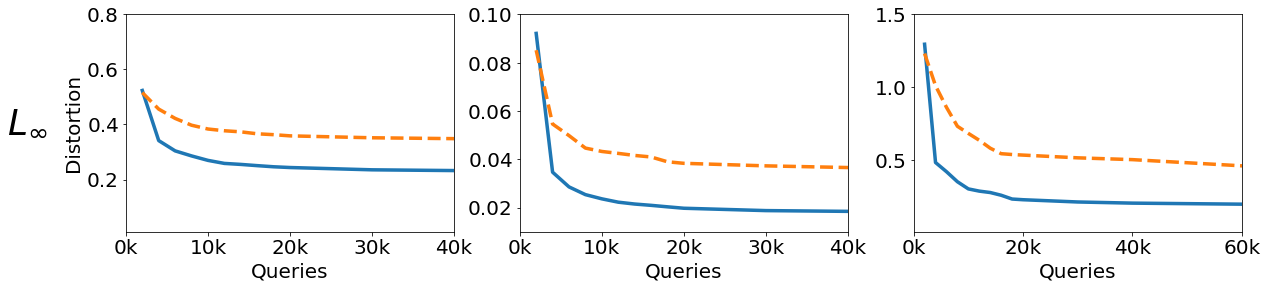

In [116]:
fig1, axes1 = plt.subplots(1, 3, figsize=(20, 4))

# MNIST
m_opt, s_opt = readlogs('logs/Linf/mnist/untargeted/log_Linf_random', epsilon=0.4)
m_sgd, s_sgd = readlogs('logs/Linf/mnist/untargeted/log_Linf_sign', epsilon=0.4)
plot_graphs(m_opt, m_sgd, legend=False,  axes=axes1[0], display=False,
            xlim=[0, 40],
            ylim=[0.01, 0.8], text='$L_\infty$', text_x=-2.7,
            xlabel='Queries', ylabel='Distortion')

# CIFAR
m_opt, s_opt = readlogs('logs/Linf/cifar10/untargeted/log_Linf_random', epsilon=0.03)
m_sgd, s_sgd = readlogs('logs/Linf/cifar10/untargeted/log_Linf_sign', epsilon=0.03)
plot_graphs(m_opt, m_sgd, legend=False,  axes=axes1[1], display=False,
            xlim=[0, 40],
            ylim=[0.01, 0.1],
            xlabel='Queries')

# IMAGENET
m_opt, s_opt = readlogs('logs/Linf/imagenet/untarget/log_Linf_random', epsilon=0.03)
m_sgd, s_sgd = readlogs('logs/Linf/imagenet/untarget/log_Linf_sign', epsilon=0.03)
plot_graphs(m_opt, m_sgd, legend=False,  axes=axes1[2], display=False,
            xlim=[0, 60],
            ylim=[0.01, 1.5],
            xlabel='Queries')

fig1.savefig('figs/u_linf.pdf', bbox_inches='tight')
plt.show()

### DIST-TARGETED

Success rate 50
Success rate 54
Success rate 50


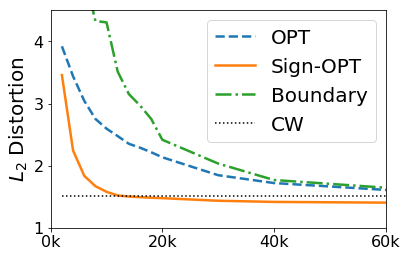

In [10]:
m_opt, s_opt = readlogs('logs/L2/mnist/targeted/log_L2_random')
m_sgd, s_sgd = readlogs('logs/L2/mnist/targeted/log_L2_sign')
m_bndry, s_bndry = readlogs('logs/L2/mnist/targeted/log_L2_boundary')
cw_dist = 1.5133
plot_graphs(m_opt, m_sgd, m_boundary=m_bndry,
            xlim=[0, 60],
            ylim=[1, 4.5], filename='figs/t_l2_mnist.pdf',# text='$L_2$',
            ylabel='$L_2$ Distortion', cw=cw_dist)

Success rate 96
Success rate 99
Success rate 100


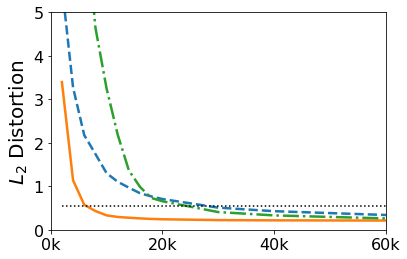

In [22]:
m_opt, s_opt = readlogs('logs/L2/cifar10/targeted/log_L2_random')
m_sgd, s_sgd = readlogs('logs/L2/cifar10/targeted/log_L2_sign')
m_bndry, s_bndry = readlogs('logs/L2/cifar10/targeted/log_L2_boundary')
cw_dist = 0.5423
plot_graphs(m_opt, m_sgd, m_boundary=m_bndry, legend=False,
            xlim=[0, 60],
            ylim=[0, 5], filename='figs/t_l2_cifar.pdf', cw=cw_dist,ylabel='$L_2$ Distortion')

Success rate 58
Success rate 65


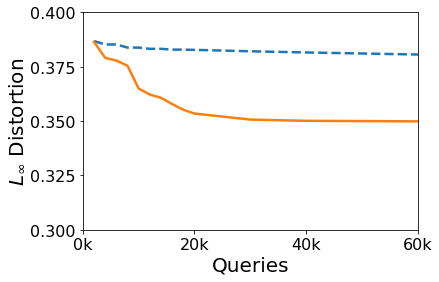

In [12]:
m_opt, s_opt = readlogs('logs/Linf/mnist/targeted/log_Linf_random', epsilon=0.4)
m_sgd, s_sgd = readlogs('logs/Linf/mnist/targeted/log_Linf_sign', epsilon=0.4)
plot_graphs(m_opt, m_sgd, legend=False,
            xlim=[0, 60],
            ylim=[0.3, 0.4], filename='figs/t_linf_mnist.pdf', #text='$L_\infty$',
            xlabel='Queries', ylabel='$L_\infty$ Distortion')

Success rate 19
Success rate 39


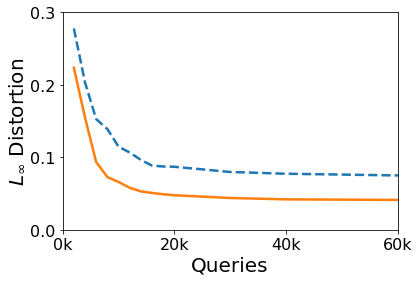

In [36]:
m_opt, s_opt = readlogs('logs/Linf/cifar10/targeted/log_Linf_random', epsilon=0.03)
m_sgd, s_sgd = readlogs('logs/Linf/cifar10/targeted/log_Linf_sign', epsilon=0.03)
plot_graphs(m_opt, m_sgd, legend=False,
            xlim=[0, 60],
            ylim=[0, 0.3], filename='figs/t_linf_cifar.pdf',
            xlabel='Queries', ylabel='$L_\infty$ Distortion')

#### TARGETED - COMBINED

Success rate 50
Success rate 54
Success rate 50
Success rate 96
Success rate 99
Success rate 100
Success rate 58
Success rate 65
Success rate 19
Success rate 39


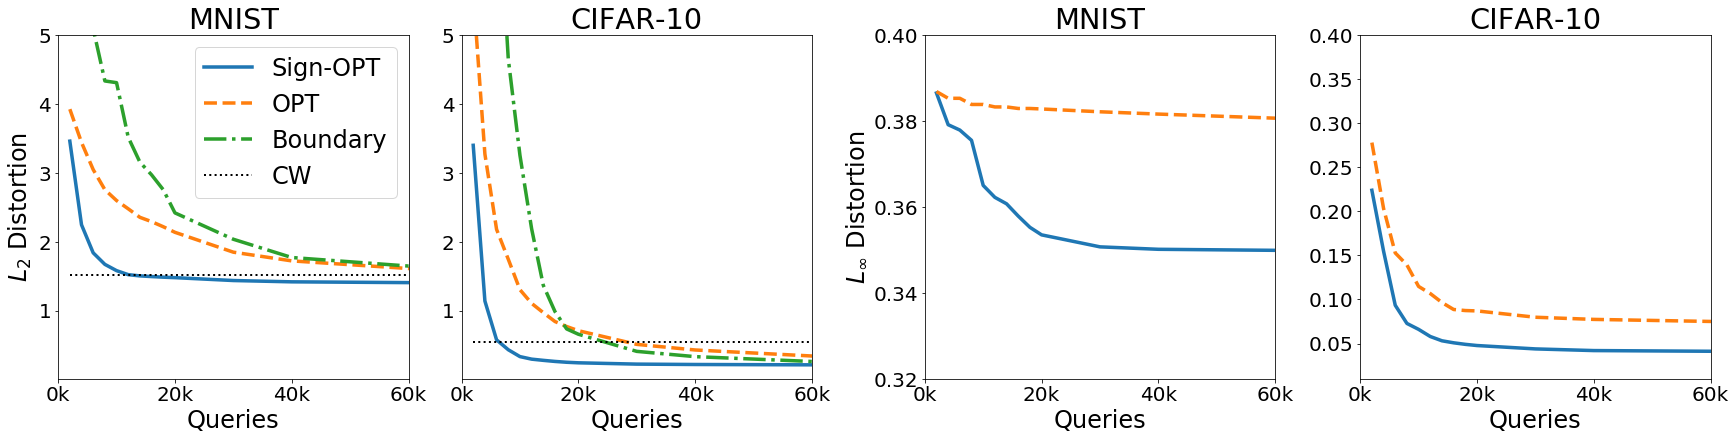

In [113]:
font = {'size': 24}

matplotlib.rc('font', **font)

fig2 = plt.figure(figsize=(24, 6), constrained_layout=True)
#spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
#fig2, axes2 = plt.subplots(1, 4, )
gs = gridspec.GridSpec(1, 4, figure=fig2)
axes2 = []
axes2.append(plt.subplot(gs[0, 0]))
axes2.append(plt.subplot(gs[0, 1]))
axes2.append(plt.subplot(gs[0, 2]))
axes2.append(plt.subplot(gs[0, 3]))

# MNIST - L2
m_opt, s_opt = readlogs('logs/L2/mnist/targeted/log_L2_random')
m_sgd, s_sgd = readlogs('logs/L2/mnist/targeted/log_L2_sign')
m_bndry, s_bndry = readlogs('logs/L2/mnist/targeted/log_L2_boundary')
cw_dist = 1.5133
plot_graphs(m_opt, m_sgd, m_boundary=m_bndry, axes=axes2[0], display=False,
            xlim=[0, 60], title='MNIST',
            ylim=[0.01, 5], # text='$L_2$',
            ylabel='$L_2$ Distortion', cw=cw_dist,xlabel='Queries')

# CIFAR - L2
m_opt, s_opt = readlogs('logs/L2/cifar10/targeted/log_L2_random')
m_sgd, s_sgd = readlogs('logs/L2/cifar10/targeted/log_L2_sign')
m_bndry, s_bndry = readlogs('logs/L2/cifar10/targeted/log_L2_boundary')
cw_dist = 0.5423
plot_graphs(m_opt, m_sgd, m_boundary=m_bndry, legend=False, axes=axes2[1], display=False,
            xlim=[0, 60], title='CIFAR-10',
            ylim=[0.01, 5], cw=cw_dist,xlabel='Queries')

# MNIST - Linf
m_opt, s_opt = readlogs('logs/Linf/mnist/targeted/log_Linf_random', epsilon=0.4)
m_sgd, s_sgd = readlogs('logs/Linf/mnist/targeted/log_Linf_sign', epsilon=0.4)
plot_graphs(m_opt, m_sgd, legend=False, axes=axes2[2], display=False,
            xlim=[0, 60], title='MNIST',
            ylim=[0.32, 0.4], yformatter='%.2f',
            xlabel='Queries', ylabel='$L_\infty$ Distortion')

# CIFAR - Lin
m_opt, s_opt = readlogs('logs/Linf/cifar10/targeted/log_Linf_random', epsilon=0.03)
m_sgd, s_sgd = readlogs('logs/Linf/cifar10/targeted/log_Linf_sign', epsilon=0.03)
plot_graphs(m_opt, m_sgd, legend=False, axes=axes2[3], display=False,
            xlim=[0, 60], title='CIFAR-10', yformatter='%.2f',
            ylim=[0.01, 0.4],
            xlabel='Queries')

fig2.savefig('figs/target.pdf', bbox_inches='tight')
plt.show()


## SUCCESS RATE

In [86]:
def plot_success(so1, ss1, sb1=None, title=None, filename=None, figsize=None,
                ylim=None, xlim=None, text=None, xlabel=None, ylabel=None, legend=True, cw=None,
                color=None):
    if figsize is not None:
        fg = figure(figsize=figsize)
    else:
        fg = figure()
    #ax = fg.gca()
                    
    plt.plot(q_list, ss1, label='Sign-OPT', linewidth=3.5, #color='#1f77b4',
            )#marker='v', markersize=10)

    plt.plot(q_list, so1, '--', label='OPT',linewidth=3.5, #color='#d62728',
            )#marker='o', markersize=10)
    if sb1 is not None:
        plt.plot(q_list, sb1, '-.', label='Boundary',linewidth=3.5, #color='tab:blue',
            )#marker='o', markersize=10)
#     plt.plot(q_list, so2, '--', label='$\epsilon_2$',linewidth=2.5, color='#d62728'
#             )#marker='o', markersize=10)
#     plt.plot(q_list, ss2, label='$\epsilon_2$', linewidth=2.5, color='#d62728'
#             )#marker='v', markersize=10)
#     plt.plot(q_list, sb2, ':', label='$\epsilon_2$', linewidth=2.5, color='#d62728'
#             )#marker='v', markersize=10)

    if cw is not None:
        plt.plot(q_list, [cw]*len(q_list), ':', label='CW', color='black')
    if title is not None:
        plt.title(title, fontsize=16)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18)
    if ylim is not None:
        plt.ylim(ylim[0], ylim[1])
    if xlim is not None:
        plt.xlim(xlim[0], xlim[1])
    if legend:
#         custom_lines = [Line2D([0], [0], linestyle='--', color='black', lw=2.5),
#                         Line2D([0], [0], linestyle='-', color='black', lw=2.5),
#                         Line2D([0], [0], linestyle=':', color='black', lw=2.5)]
#         custom_labels = ['OPT', 'Sign-OPT', 'Boundary']
#         plt.legend(custom_lines, custom_labels, prop={'size': 15})
        plt.legend(prop={'size': 14})
    plt.gca().xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, p: '{0}k'.format(int(x))))
    
    if text is not None:
        plt.text(-0.3, 0.5, text, ha='center', va='center', transform=plt.gca().transAxes,
                 fontsize=36)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    #labelLines(plt.gca().get_lines(), fontsize=14)

    if filename is not None:
        fg.savefig(filename, bbox_inches='tight')
    plt.show()
    return


Success rate 99
Success rate 100
Success rate 96


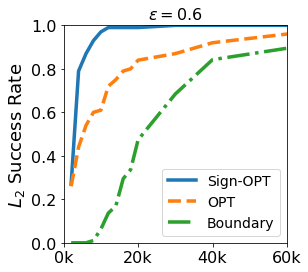

In [88]:
e1, e2 = 0.6, 0.3
_, so1 = readlogs('logs/L2/cifar10/untargeted/log_L2_random', epsilon=e1)
_, ss1 = readlogs('logs/L2/cifar10/untargeted/log_L2_sign', epsilon=e1)
_, sb1 = readlogs('logs/L2/cifar10/targeted/log_L2_boundary', epsilon=e1)

plot_success(so1, ss1, sb1, figsize=(4,4),
            xlim=[0, 60],
            ylim=[0, 1], filename='figs/success_u_l2_e1.pdf',# text='$L_2$',
            ylabel='$L_2$ Success Rate', title='$\epsilon={0}$'.format(e1))

Success rate 87
Success rate 87
Success rate 75


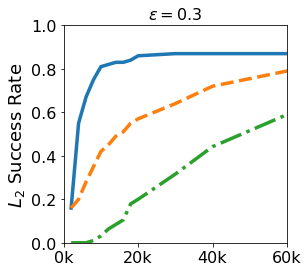

In [89]:
_, so2 = readlogs('logs/L2/cifar10/untargeted/log_L2_random', epsilon=e2)
_, ss2 = readlogs('logs/L2/cifar10/untargeted/log_L2_sign', epsilon=e2)
_, sb2 = readlogs('logs/L2/cifar10/targeted/log_L2_boundary', epsilon=e2)
plot_success(so2, ss2, sb2,
            xlim=[0, 60], legend=False, figsize=(4,4),
            ylim=[0, 1], filename='figs/success_u_l2_e2.pdf',# text='$L_2$',
            ylabel='$L_2$ Success Rate', title='$\epsilon={0}$'.format(e2))

Success rate 75
Success rate 92


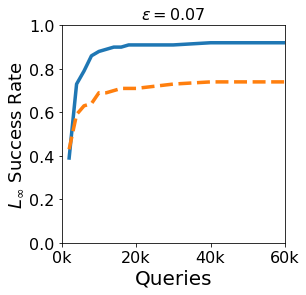

In [90]:
e1, e2 = 0.07, 0.03
_, so1 = readlogs('logs/Linf/cifar10/untargeted/log_Linf_random', epsilon=e1)
_, ss1 = readlogs('logs/Linf/cifar10/untargeted/log_Linf_sign', epsilon=e1)
#_, sb1 = readlogs('logs/L2/cifar10/targeted/log_L2_boundary', epsilon=e1)

plot_success(so1, ss1,  figsize=(4,4),
            xlim=[0, 60], legend=False,
            ylim=[0, 1], filename='figs/success_u_linf_e1.pdf',# text='$L_2$',
            ylabel='$L_\infty$ Success Rate', xlabel='Queries', title='$\epsilon={0}$'.format(e1))

Success rate 43
Success rate 70


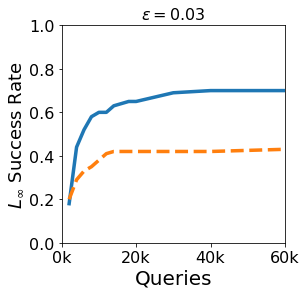

In [93]:
_, so1 = readlogs('logs/Linf/cifar10/untargeted/log_Linf_random', epsilon=e2)
_, ss1 = readlogs('logs/Linf/cifar10/untargeted/log_Linf_sign', epsilon=e2)
#_, sb1 = readlogs('logs/L2/cifar10/targeted/log_L2_boundary', epsilon=e1)

plot_success(so1, ss1,  figsize=(4,4),
            xlim=[0, 60], legend=False,
            ylim=[0, 1], filename='figs/success_u_linf_e2.pdf',# text='$L_2$',
            ylabel='$L_\infty$ Success Rate',xlabel='Queries', title='$\epsilon={0}$'.format(e2))

Success rate 90
Success rate 97
Success rate 96


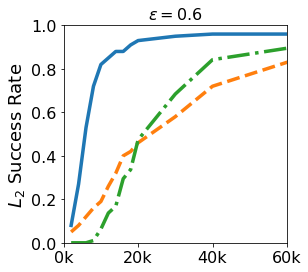

In [94]:
e1, e2 = 0.6, 0.3
_, so1 = readlogs('logs/L2/cifar10/targeted/log_L2_random', epsilon=e1)
_, ss1 = readlogs('logs/L2/cifar10/targeted/log_L2_sign', epsilon=e1)
_, sb1 = readlogs('logs/L2/cifar10/targeted/log_L2_boundary', epsilon=e1)

plot_success(so1, ss1, sb1, figsize=(4,4),
            xlim=[0, 60], legend=False,
            ylim=[0, 1], filename='figs/success_t_l2_e1.pdf',# text='$L_2$',
            ylabel='$L_2$ Success Rate', title='$\epsilon={0}$'.format(e1))

Success rate 64
Success rate 75
Success rate 75


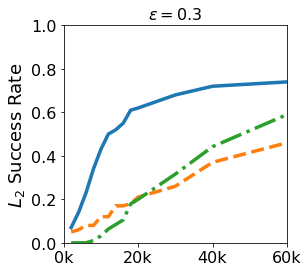

In [95]:
_, so1 = readlogs('logs/L2/cifar10/targeted/log_L2_random', epsilon=e2)
_, ss1 = readlogs('logs/L2/cifar10/targeted/log_L2_sign', epsilon=e2)
_, sb1 = readlogs('logs/L2/cifar10/targeted/log_L2_boundary', epsilon=e2)

plot_success(so1, ss1, sb1, figsize=(4,4),
            xlim=[0, 60], legend=False,
            ylim=[0, 1], filename='figs/success_t_l2_e2.pdf',# text='$L_2$',
            ylabel='$L_2$ Success Rate', title='$\epsilon={0}$'.format(e2))

Success rate 50
Success rate 84


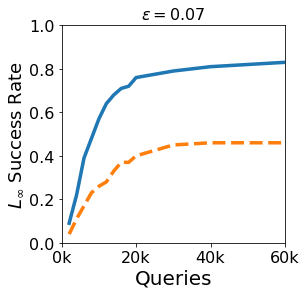

In [97]:
e1, e2 = 0.07, 0.03
_, so1 = readlogs('logs/Linf/cifar10/targeted/log_Linf_random', epsilon=e1)
_, ss1 = readlogs('logs/Linf/cifar10/targeted/log_Linf_sign', epsilon=e1)


plot_success(so1, ss1,  figsize=(4,4),
            xlim=[0, 60], legend=False,
            ylim=[0, 1], filename='figs/success_t_linf_e1.pdf',# text='$L_2$',
            ylabel='$L_\infty$ Success Rate', xlabel='Queries', title='$\epsilon={0}$'.format(e1))

Success rate 19
Success rate 39


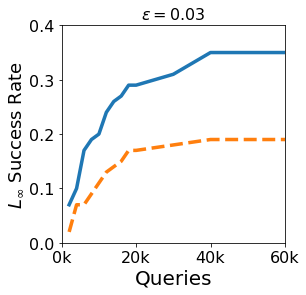

In [100]:
_, so1 = readlogs('logs/Linf/cifar10/targeted/log_Linf_random', epsilon=e2)
_, ss1 = readlogs('logs/Linf/cifar10/targeted/log_Linf_sign', epsilon=e2)


plot_success(so1, ss1,  figsize=(4,4),
            xlim=[0, 60], legend=False,
            ylim=[0, 0.4], filename='figs/success_t_linf_e2.pdf',# text='$L_2$',
            ylabel='$L_\infty$ Success Rate',xlabel='Queries', title='$\epsilon={0}$'.format(e2))

### SVM VS SIGN SGD

In [18]:
m_sgd, _ = readlogs('logs/L2/mnist/untargeted/log_L2_sign')
m_svm, _ = readlogs('logs/L2/mnist/untargeted/log_L2_svm')
m_sgd_t, _ = readlogs('logs/L2/mnist/targeted/log_L2_sign')
m_svm_t, _ = readlogs('logs/L2/mnist/targeted/log_L2_svm')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plots = [[m_sgd_t, 'Sign-OPT-T', ':'], [m_svm_t, 'SVM-OPT-T', '-.']]

plot_graphs(m_sgd, m_svm, plots=plots, legendsize=16,axes=axes[0],display=False,
            xlim=[0, 20],
            ylim=[1, 4], filename='figs/svm_mnist.pdf',# text='$L_2$',
            ylabel='$L_2$ Distortion', xlabel='Queries', label1='Sign-OPT-U', label2='SVM-OPT-U', figsize=(4,4))

Success rate 96
Success rate 96
Success rate 54
Success rate 51


Success rate 100
Success rate 100
Success rate 99
Success rate 94


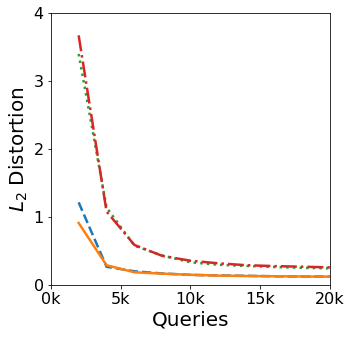

In [6]:
m_sgd, _ = readlogs('logs/L2/cifar10/untargeted/log_L2_sign')
m_svm, _ = readlogs('logs/L2/cifar10/untargeted/log_L2_svm')

m_sgd_t, _ = readlogs('logs/L2/cifar10/targeted/log_L2_sign')
m_svm_t, _ = readlogs('logs/L2/cifar10/targeted/log_L2_svm')

plots = [[m_sgd_t, 'Sign-OPT-T', ':'], [m_svm_t, 'SVM-OPT-T', '-.']]

plot_graphs(m_sgd, m_svm,
            xlim=[0, 20], plots=plots, legend=False,
            ylim=[0, 4], filename='figs/svm_cifar.pdf',xlabel='Queries',# text='$L_2$',
            ylabel='$L_2$ Distortion', label1='Sign-OPT', label2='SVM-OPT', figsize=(5,5))

### Combined

Success rate 96
Success rate 96
Success rate 54
Success rate 51
Success rate 100
Success rate 100
Success rate 99
Success rate 94
Success rate 15
Success rate 16
Success rate 20
Success rate 21
Success rate 22
Success rate 22
Success rate 22
Success rate 21


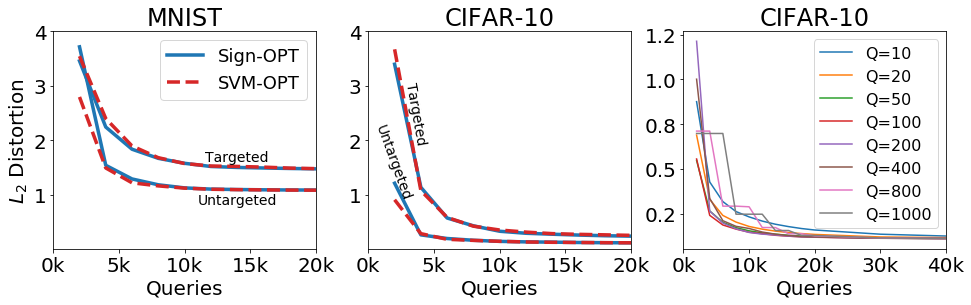

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# MNIST
m_sgd, _ = readlogs('logs/L2/mnist/untargeted/log_L2_sign')
m_svm, _ = readlogs('logs/L2/mnist/untargeted/log_L2_svm')
m_sgd_t, _ = readlogs('logs/L2/mnist/targeted/log_L2_sign')
m_svm_t, _ = readlogs('logs/L2/mnist/targeted/log_L2_svm')

plots = [[m_sgd, 'Sign-OPT', '-', '#1f77b4'],
         [m_svm, 'SVM-OPT', '--', '#d62728'],
         [m_sgd_t, None, '-', '#1f77b4'],
         [m_svm_t, None, '--', '#d62728']]

plot_graphs(m_opt=None, m_sign=None, plots=plots, legendsize=18, axes=axes[0], display=False,
            xlim=[0, 20], ylim=[0.01, 4],  title='MNIST',
            ylabel='$L_2$ Distortion', xlabel='Queries', label1='Sign-OPT', label2='SVM-OPT')

axes[0].text(14, 1.7, 'Targeted', ha='center', va='center',color='black', fontsize=14)
axes[0].text(14, 0.9, 'Untargeted', ha='center', va='center',color='black', fontsize=14)

# CIFAR
m_sgd, _ = readlogs('logs/L2/cifar10/untargeted/log_L2_sign')
m_svm, _ = readlogs('logs/L2/cifar10/untargeted/log_L2_svm')

m_sgd_t, _ = readlogs('logs/L2/cifar10/targeted/log_L2_sign')
m_svm_t, _ = readlogs('logs/L2/cifar10/targeted/log_L2_svm')

plots = [[m_sgd, 'Sign-OPT', '-', '#1f77b4'],
         [m_svm, 'SVM-OPT', '--', '#d62728'],
         [m_sgd_t, None, '-', '#1f77b4'],
         [m_svm_t, None, '--', '#d62728']]

plot_graphs(m_opt=None, m_sign=None, plots=plots, legend=False, axes=axes[1], display=False,
            xlim=[0, 20], ylim=[0.01, 4], xlabel='Queries', title='CIFAR-10',
            #ylabel='$L_2$ Distortion',
            label1='Sign-OPT', label2='SVM-OPT')
axes[1].text(3.6, 2.5, 'Targeted', ha='center', va='center',color='black', fontsize=14, rotation=-80)
axes[1].text(1.9, 1.6, 'Untargeted', ha='center', va='center',color='black', fontsize=14, rotation=-70)


# HyperParameter
m_10, s_10 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_10', epsilon=0.05)
m_20, s_20 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_20', epsilon=0.05)
m_50, s_50 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_50', epsilon=0.05)
m_100, s_100 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_100', epsilon=0.05)
m_200, s_200 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_200', epsilon=0.05)
m_400, s_400 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_400', epsilon=0.05)
# m_600, s_600 = readlogs('logs/Linf/cifar10/untargeted/k/log_Linf_600', epsilon=0.05)
m_800, s_800 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_800', epsilon=0.05)
m_1000, s_1000 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_1000', epsilon=0.05)

axes[2].plot(q_list, m_10, label='Q=10')
axes[2].plot(q_list, m_20, label='Q=20')
axes[2].plot(q_list, m_50, label='Q=50')
axes[2].plot(q_list, m_100, label='Q=100')
axes[2].plot(q_list, m_200, label='Q=200')
axes[2].plot(q_list, m_400, label='Q=400')
axes[2].plot(q_list, m_800, label='Q=800')
axes[2].plot(q_list, m_1000, label='Q=1000')
axes[2].set_xlabel('Queries')
#axes[2].set_ylabel('Distortion')
axes[2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[2].xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, p: '{0}k'.format(int(x))))

#plt.ylim([0, 1])
axes[2].set_xlim([0, 40])
axes[2].legend(prop={'size':16})
axes[2].set_title('CIFAR-10')
fig.savefig('figs/svm-param.pdf', bbox_inches='tight')
plt.show()

### ADVERSARIAL MODEL

Success rate 6
Success rate 9


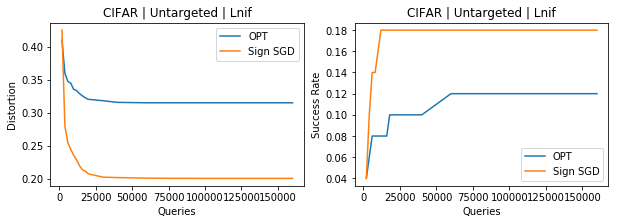

In [36]:
m_opt, s_opt = readlogs('logs/Linf/cifar10/untargeted/log_Linf_random_vgg_adv', epsilon=0.05)
m_sgd, s_sgd = readlogs('logs/Linf/cifar10/untargeted/log_Linf_sign_vgg_adv', epsilon=0.05)
plot_graphs(m_opt, s_opt, m_sgd, s_sgd, title='CIFAR | Untargeted | Lnif')

Success rate 23
Success rate 41


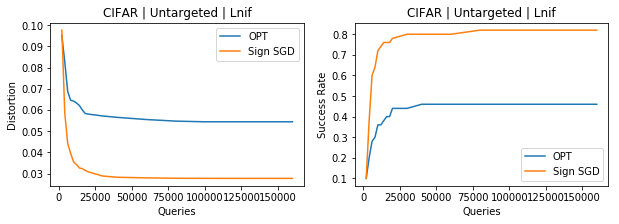

In [35]:
m_opt, s_opt = readlogs('logs/Linf/cifar10/untargeted/log_Linf_random_vgg_plain', epsilon=0.05)
m_sgd, s_sgd = readlogs('logs/Linf/cifar10/untargeted/log_Linf_sign_vgg_plain', epsilon=0.05)
plot_graphs(m_opt, s_opt, m_sgd, s_sgd, title='CIFAR | Untargeted | Lnif')

In [38]:
m_opt, s_opt = readlogs('logs/Linf/cifar10/untargeted/adv/log_Linf', epsilon=0.1)

Success rate 36


### HYPERPARAMETER

Success rate 15
Success rate 16
Success rate 20
Success rate 21
Success rate 22
Success rate 22
Success rate 22
Success rate 21


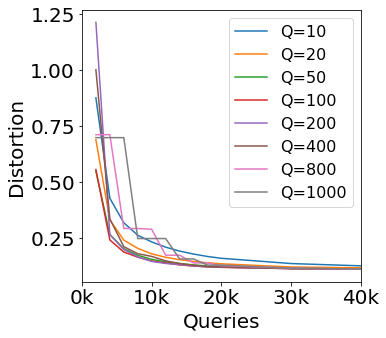

In [14]:
m_10, s_10 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_10', epsilon=0.05)
m_20, s_20 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_20', epsilon=0.05)
m_50, s_50 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_50', epsilon=0.05)
m_100, s_100 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_100', epsilon=0.05)
m_200, s_200 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_200', epsilon=0.05)
m_400, s_400 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_400', epsilon=0.05)
# m_600, s_600 = readlogs('logs/Linf/cifar10/untargeted/k/log_Linf_600', epsilon=0.05)
m_800, s_800 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_800', epsilon=0.05)
m_1000, s_1000 = readlogs('logs/Linf/cifar10/untargeted/k/log_L2_1000', epsilon=0.05)

fg = figure(figsize=(5,5))
plt.plot(q_list, m_10, label='Q=10')
plt.plot(q_list, m_20, label='Q=20')
plt.plot(q_list, m_50, label='Q=50')
plt.plot(q_list, m_100, label='Q=100')
plt.plot(q_list, m_200, label='Q=200')
plt.plot(q_list, m_400, label='Q=400')
# plt.plot(query_list, m_600, label='600')
plt.plot(q_list, m_800, label='Q=800')
plt.plot(q_list, m_1000, label='Q=1000')
plt.xlabel('Queries')
plt.ylabel('Distortion')
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, p: '{0}k'.format(int(x))))

#plt.ylim([0, 1])
plt.xlim([0, 40])
plt.legend(prop={'size':16})
fg.savefig('figs/hyperparameter.pdf', bbox_inches='tight')
plt.show()